In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('results/N100-F1000-S100-R100-result-v12.csv')
df.describe()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
count,56700.000000,56700.000000,4.266600e+04,4.266600e+04,56700.000000,56700.000000,5.670000e+04
mean,0.500000,0.700000,6.903100e+06,4.366087e+06,0.184606,0.266243,2.004257e+06
std,0.302768,0.129101,8.143602e+06,5.306299e+06,0.064276,0.133079,1.118936e+05
min,0.000000,0.500000,8.855692e+05,6.184599e+05,0.000345,0.044286,1.490691e+06
25%,0.250000,0.600000,2.774893e+06,1.740025e+06,0.148035,0.155936,1.936076e+06
50%,0.500000,0.700000,4.288688e+06,2.695656e+06,0.180300,0.255421,2.000394e+06
75%,0.750000,0.800000,7.804394e+06,4.930208e+06,0.241778,0.362919,2.068945e+06
max,1.000000,0.900000,1.455432e+08,1.067806e+08,0.301018,0.717458,2.357444e+06


In [29]:
df.corr()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
correlation,1.000000e+00,-1.124640e-17,0.008170,0.089344,-4.976825e-01,9.460362e-01,-4.491748e-02
load,-1.124640e-17,1.000000e+00,0.629875,0.611129,2.322824e-19,5.199953e-19,-2.629499e-18
v1,8.170004e-03,6.298755e-01,1.000000,0.990567,-1.155133e-01,-2.033959e-03,3.028199e-01
v2,8.934368e-02,6.111292e-01,0.990567,1.000000,-1.638432e-01,8.591427e-02,2.979602e-01
disturbance,-4.976825e-01,2.322824e-19,-0.115513,-0.163843,1.000000e+00,-4.440599e-01,-3.885344e-02
mean_ca,9.460362e-01,5.199953e-19,-0.002034,0.085914,-4.440599e-01,1.000000e+00,-7.899961e-02
actual_load,-4.491748e-02,-2.629499e-18,0.302820,0.297960,-3.885344e-02,-7.899961e-02,1.000000e+00


In [30]:
df = df.drop('v1', axis=1)

In [31]:
vals = df.drop(['disturbance', 'actual_load', 'mean_ca'], axis=1).groupby(['algorithm', 'correlation', 'load']).median()
vals = vals.unstack(0)
vals.reset_index(inplace=True)
vals.head()

correlation  load            v2                            
algorithm                              BF            RR          SALP
0                 0.0  0.50  1.080290e+06  1.383331e+06  1.054764e+06
1                 0.0  0.55  1.321052e+06  1.832948e+06  1.290168e+06
2                 0.0  0.60  1.622364e+06  2.473015e+06  1.585021e+06
3                 0.0  0.65  2.010353e+06  3.460358e+06  1.965173e+06
4                 0.0  0.70  2.528704e+06  4.341583e+06  2.474060e+06

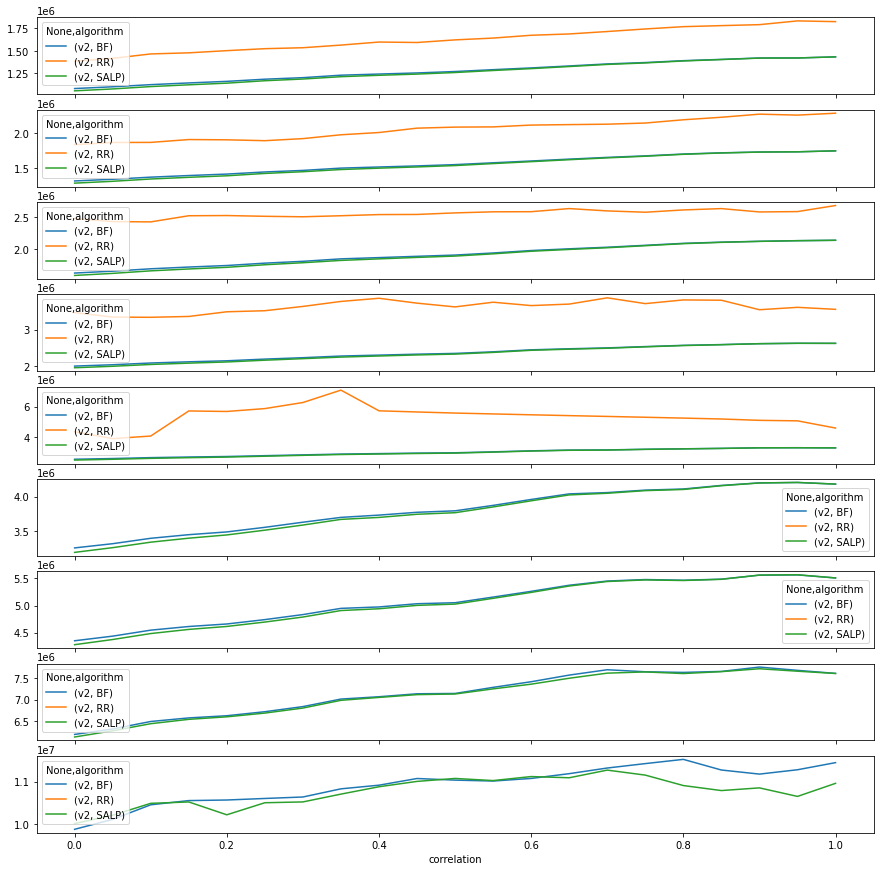

In [32]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

In [33]:
# cors = np.array([0,.25,.5,.75,1])
cors = np.array([-1])
fig, axes = plt.subplots(cors.size, 1, figsize=(15,15), sharex=True, sharey=True)
for i in range(cors.size):
    vals[vals['correlation']==cors[i]].drop('correlation', axis=1).plot(x='load', ax=axes[i], legend=True)
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

In [18]:
df.groupby(['algorithm', 'load']).count()

correlation   v2  disturbance  mean_ca  actual_load
algorithm load                                                     
BF        0.50          100  100          100      100          100
          0.55          100  100          100      100          100
          0.60          100  100          100      100          100
          0.65          100  100          100      100          100
          0.70          100  100          100      100          100
          0.75          100  100          100      100          100
          0.80          100  100          100      100          100
          0.85          100  100          100      100          100
          0.90          100  100          100      100          100
RR        0.50          100  100          100      100          100
          0.55          100  100          100      100          100
          0.60          100  100          100      100          100
          0.65          100  100          100      100          100
          0.70          100  100          100      100          100
          0.75          100  100          100      100          100
          0.80          100  100          100      100          100
          0.85          100  100          100      100          100
          0.90          100  100          100      100          100
SALP      0.50          100  100          100      100          100
          0.55          100  100          100      100          100
          0.60          100  100          100      100          100
          0.65          100  100          100      100          100
          0.70          100  100          100      100          100
          0.75          100  100          100      100          100
          0.80          100  100          100      100          100
          0.85          100  100          100      100          100
          0.90          100  100          100      100          100

In [19]:
dist = df.drop(['v2', 'actual_load', 'mean_ca', 'load'], axis=1)
dist = dist.drop_duplicates()
dist = dist.groupby(['algorithm', 'correlation']).mean()
dist = dist.unstack(0)
dist.reset_index(inplace=True)
dist.head()

correlation disturbance                   
algorithm                      BF       RR      SALP
0                  -1    0.183074  0.30482  0.062059

<AxesSubplot:xlabel='correlation'>

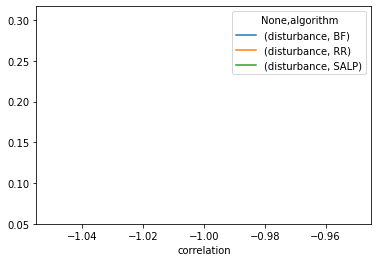

In [20]:
# loads = vals['load'].unique()
# fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
# for i in range(loads.size):
#     dist[dist['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
# plt.show()
dist.plot(x='correlation', legend=True)

In [21]:
acld = df.drop(['algorithm', 'v2', 'disturbance', 'mean_ca', 'load'], axis=1).groupby(['correlation']).mean()
acld = acld.drop_duplicates()
# acld = acld.unstack(0)
acld.reset_index(inplace=True)
acld.head()

,correlation,actual_load
0,-1,498170.823459


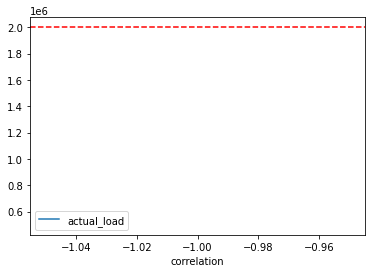

In [22]:
est = 2.0 * 10**6
# loads = acld['load'].unique()
# fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
# for i in range(loads.size):
#     acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
#     axes[i].axhline(est,color='red',ls='--')
# plt.show()
fig, ax = plt.subplots()
acld.plot(x='correlation', ax=ax, legend=True)
ax.axhline(est,color='red',ls='--')
plt.show()

In [23]:
# loads = acld['load'].unique()
# fig, axes = plt.subplots(loads.size, 2, figsize=(20,15), sharex=True)
# for i in range(loads.size):
#     acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][0], legend=True)
#     axes[i][0].axhline(est,color='red',ls='--', label="estimated")
#     vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][1], legend=True)

# plt.show()

In [25]:
mca = df.drop(['v2', 'actual_load', 'disturbance', 'load'], axis=1)
mca = mca.drop_duplicates()
mca = mca.groupby(['algorithm', 'correlation']).mean()
mca = mca.unstack(0)
mca.reset_index(inplace=True)
mca.head()

correlation   mean_ca                    
algorithm                    BF        RR      SALP
0                  -1  0.071301  0.131193  0.014462

<AxesSubplot:xlabel='correlation'>

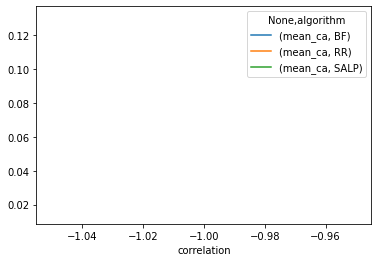

In [26]:
mca.plot(x='correlation', legend=True)